# Review: Basic checks for Spheroidal harmonic function

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Import useful things from kerr
from kerr.pttools import slm
from kerr import sYlm

# Other things  
from numpy import pi,cos,sin,log,exp,linalg,linspace,array,sqrt
from scipy.integrate import trapz

# Setup plotting backend
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
from matplotlib.pyplot import *

The highest level init for nrutils is located at: /Users/book/JOKI/Libs/KOALA/nrutils_dev/nrutils/__init__.pyc

>> Initiating nrutils ...

>> Sub-Packages to be imported:
   -> core
   -> generate
   -> manipulate
   -> tools
>> Please note style conventions:                  
   * lower case function/method/variable names                  
   * no underscore in names unless there are repeated letters, or counfounded syllables                  
   * information is implicitely in time domain unless explicitely stated.                  
   * frequency domain information will start with "fd".

nrutils:

  .core: 
      .basics*
      .basics
      .nrsc
  .generate: 
  .manipulate: 
      .bundlers
      .rotate
  .tools: 
    .unit: 
      .conversion

kerr## Found formula module "ksm2_cw"
kerr## Found formula module "ksm2_sc"
kerr## Found formula module "ksm2_slm_norm"
kerr## Found formula module "mmrdnp_090117v2"
kerr## Found formula module "mmrdnp_100117"
kerr## Found formula module "

## Evaluate the spheroidal harmonic function, and plot: convergence and theta dependence (note that phi dependence is $exp(i\phi)$). Other useful things to note are:

* ```slm``` calls ```leaver```, which return QNM frequencies and separation constants
* The consistency of the values used with leaver's equation is an internal check 
* Ideally the spheroidal harmonic fucntions would be normalized automatically, but this is not the case. Currently the scaling is such that there is correspondence with spherical hamonic conventions at $j=0$
* Normalization must be toggle via the ```norm``` keyword.

(slm)>> Checking consistency of QNM frequncy and separation constant used against Leavers constraint equations:
	*  leaver_workfunction(jf=0.6800,l,m,[cw,sc]) = 1.75004887587e-08
	*  cw = (0.824358032575-0.252038259428j)
	*  sc = (8.72996164884+0.446985546772j)
(slm)>> The constant needed to recover the spherical harmonic scaling at zero spin is: (1.00000000003+1.05399515596e-16j)


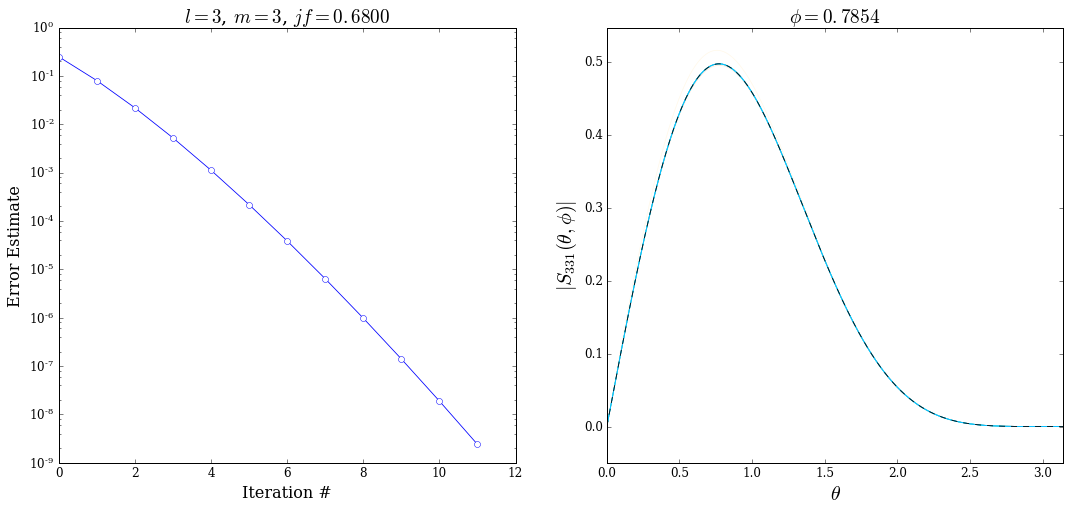

In [6]:
# Define which mode to use 
l,m,n = 3,3,1
jf = 0.68

# Define which angles to use 
ph = pi/4
th = linspace(0,pi,1024)

# Call the spheroidal fucntion: 
f = slm(jf,l,m,n,th,ph,plot=True,verbose=True)

## Demonstrate Recovery of Spherical Harmonics at zero spin

(slm)>> Checking consistency of QNM frequncy and separation constant used against Leavers constraint equations:
	*  leaver_workfunction(jf=0.0000,l,m,[cw,sc]) = 2.83872022771e-15
	*  cw = (0.373671684418-0.0889623156889j)
	*  sc = (4-1.34478918208e-19j)
(slm)>> The constant needed to recover the spherical harmonic scaling at zero spin is: (1.00001970396-2.33648056627e-20j)


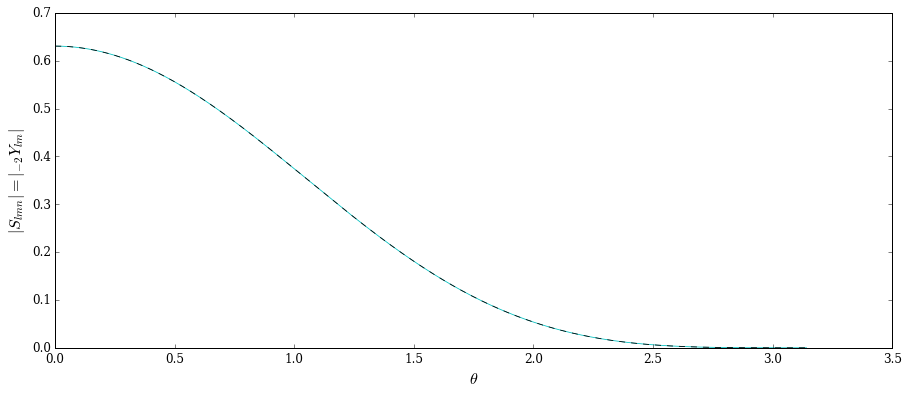

In [13]:

# NOTE that spin weights for slm and sYlm are set to -2 by defualt.

f = slm(0,l,m,n,th,ph,verbose=True)
g = sYlm(-2,l,m,th,ph)

figure( figsize=3*array([5,2]) )
plot(th,abs(f),'c-')
plot(th,abs(g),'--k')
xlabel(r'$\theta$')
ylabel(r'$|S_{lmn}|=|_{-2}Y_{lm}|$')


## Verify internal Normalization

In [14]:

for jf_ in linspace(0,0.99,11):
    f = slm(jf_,l,m,n,th,ph)
    print sqrt(trapz(f.conj()*f*sin(th),x=th)*(2*pi))

g = sYlm(-2,l,m,th,ph)

print sqrt(trapz(g.conj()*g*sin(th),x=th)*(2*pi))

(0.999999017624+0j)
(0.999998815796+0j)
(1.00000206322+0j)
(1.00000998674+0j)
(1.00002351194+0j)
(1.00004251998+0j)
(1.00006419146+0j)
(1.00007920525+0j)
(1.00006269369+0j)
(0.999956615736+0j)
(1.00014766272+0j)
(0.999999017624+0j)


## Make plots for many examples

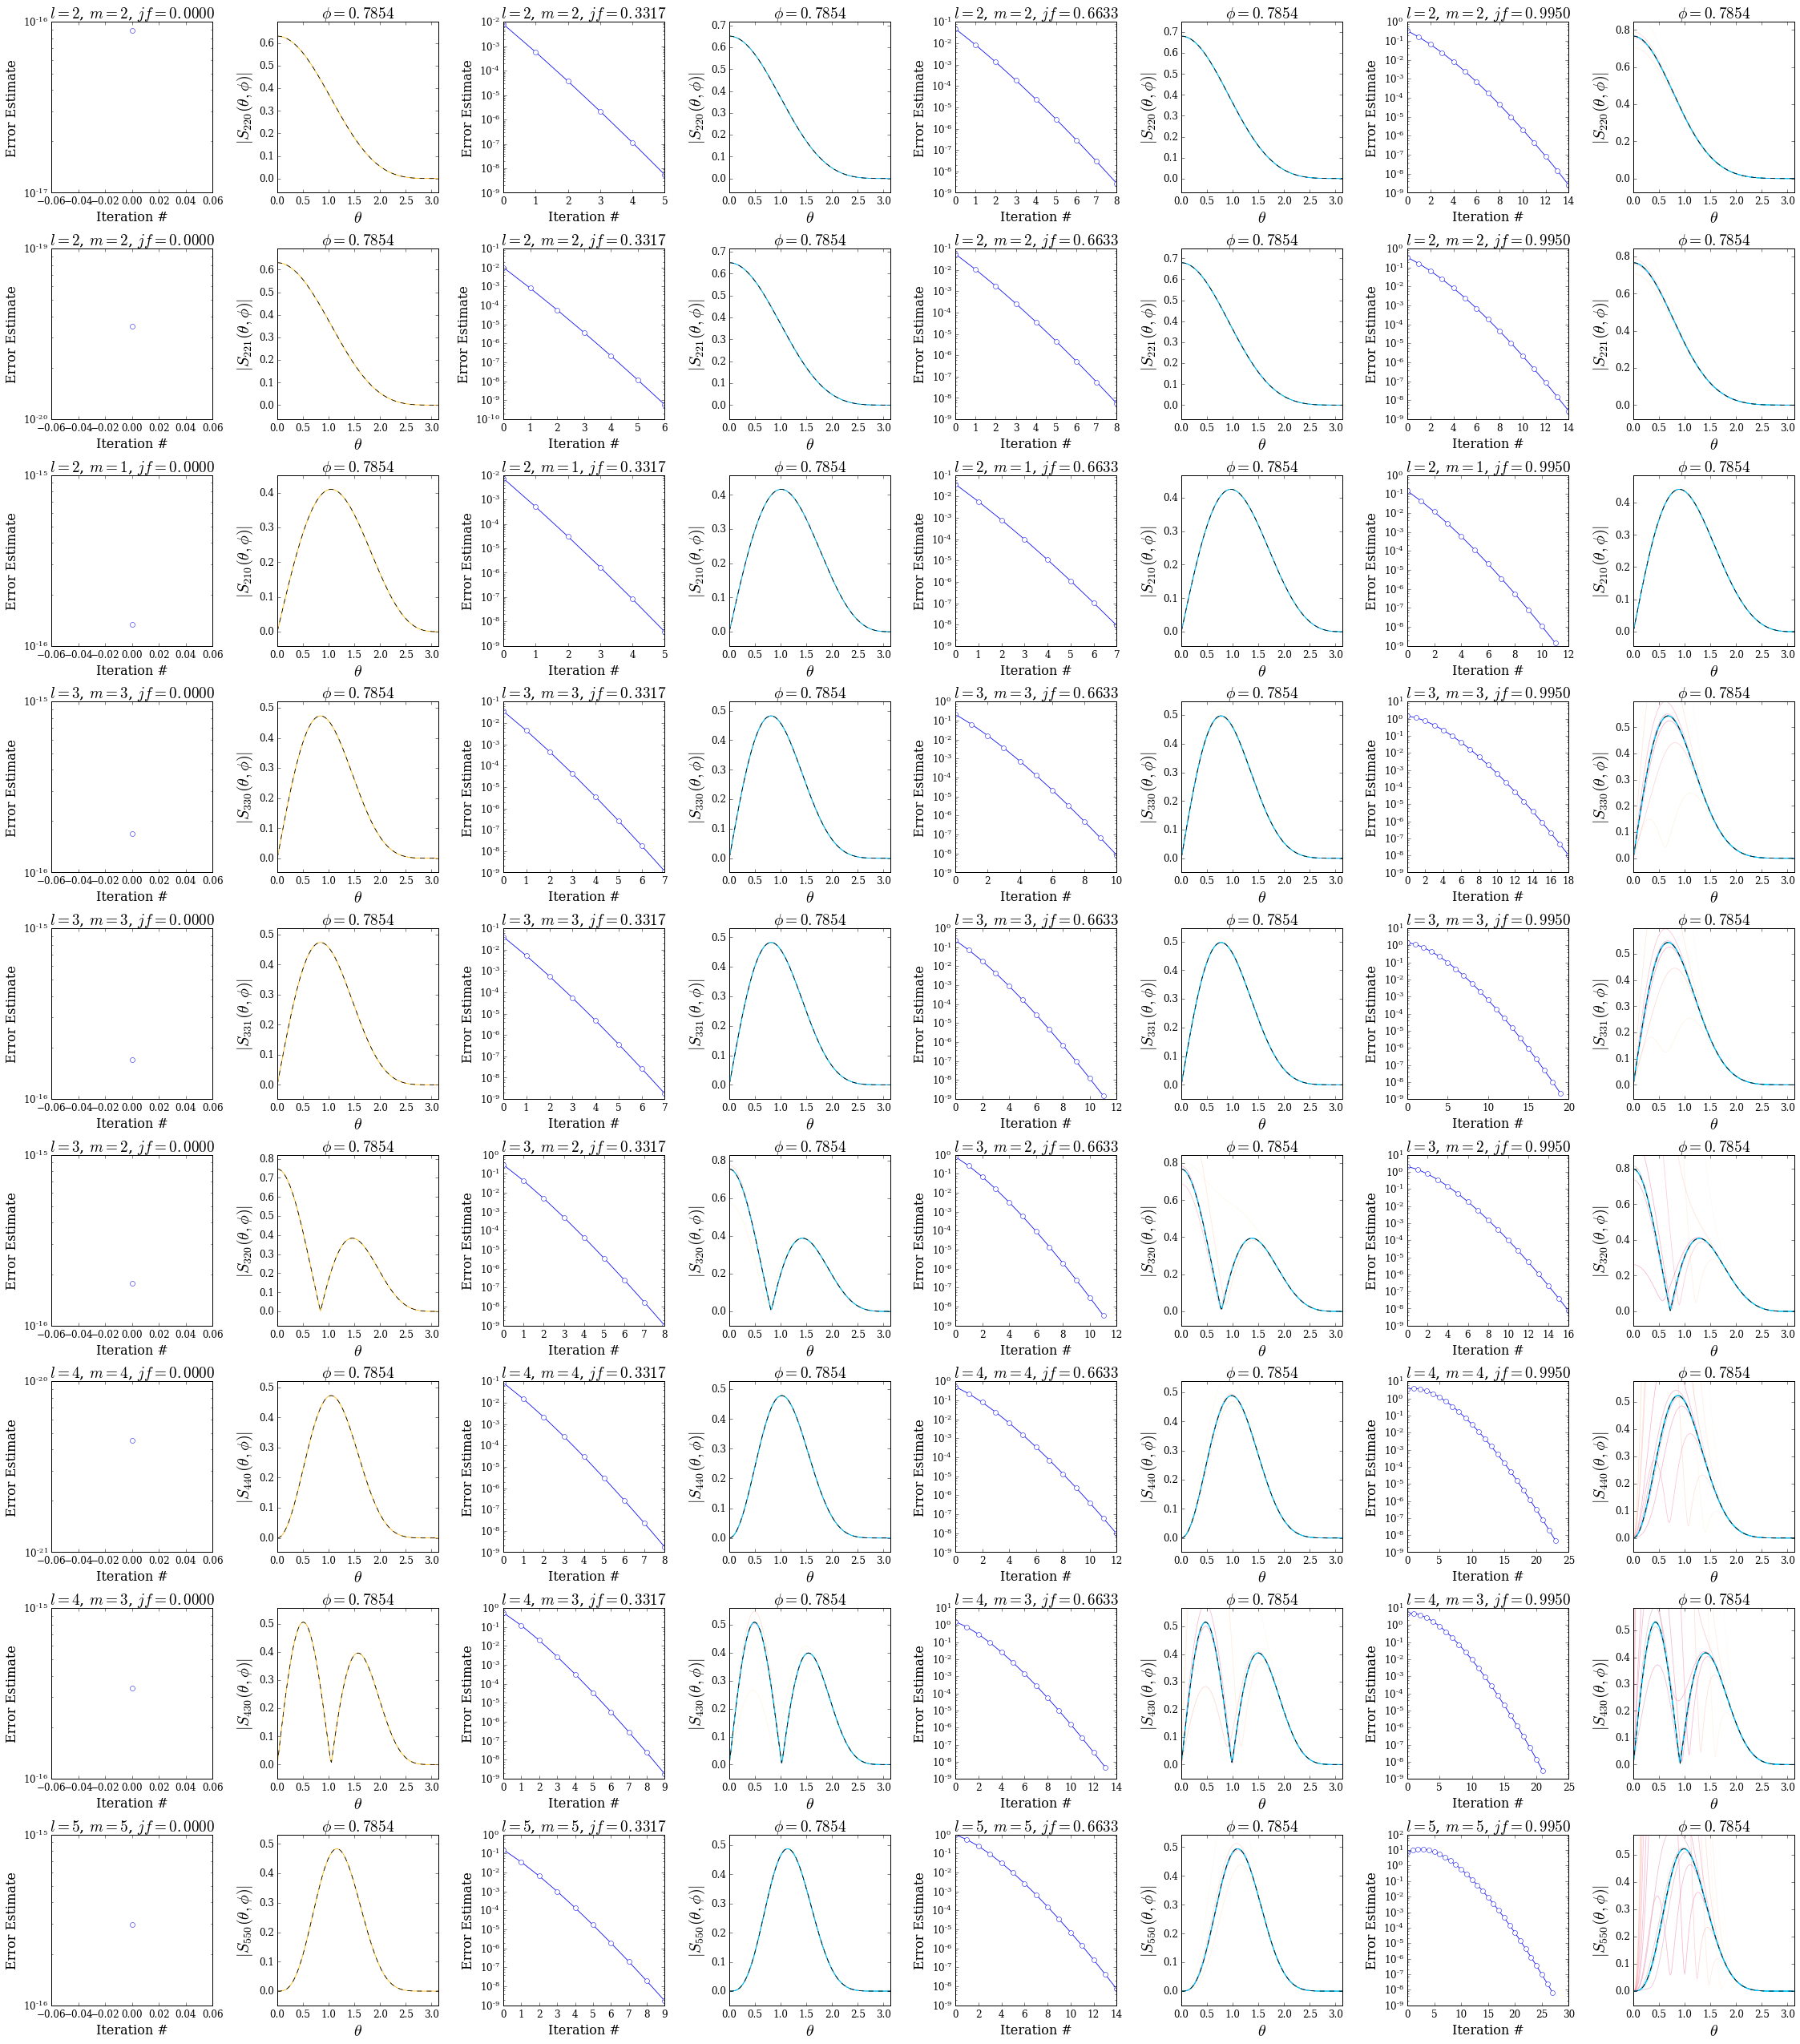

In [8]:
#
lmn = [ (2,2,0), (2,2,1), (2,1,0), (3,3,0), (3,3,1), (3,2,0), (4,4,0), (4,3,0), (5,5,0) ]

#
jf_range = linspace(0,0.995,4)

# Define which angles to use 
ph = pi/4
th = linspace(0,pi,180)

#
fig,axarr = subplots(len(lmn), 2*len(jf_range),figsize=4*array( [2*len(jf_range),len(lmn)] ))
tight_layout(pad=3, w_pad=3, h_pad=3)

#
for k,(l,m,n) in enumerate(lmn):
    for h,jf in enumerate(jf_range):
        #
        ax = [ axarr[k,2*h],axarr[k,2*h+1] ]
        slm(jf,l,m,n,th,ph,plot=True,norm=True,ax=ax)

savefig('test_slm_composite.pdf')

## View how phase of Slm function change with spin (?)